In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Erdos Fall 2022/grammar_train.csv', index_col=0)

In [5]:
train

,cleaned_full_text,grammar_score,ratio_grammar_correct_sentences
0,I think that students would benefit from learn...,4.0,0.666667
1,When a problem is a change you have to let it ...,2.0,0.357143
2,"Dear, Principal If u change the school policy ...",3.0,0.631579
3,The best time in life is when you become yours...,4.0,0.916667
4,Small act of kindness can impact in other peop...,2.5,0.000000
...,...,...,...
3906,I believe using cellphones in class for educat...,2.5,0.500000
3907,"Working alone, students do not have to argue w...",3.5,0.437500
3908,"""A problem is a chance for you to do your best...",3.5,0.375000
3909,Many people disagree with Albert Schweitzer's ...,4.5,1.000000


# Use kfold validation

In [6]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, r2_score
from sklearn.preprocessing import StandardScaler

kfold = KFold(n_splits = 10,
              shuffle = True,
              random_state = 404)

# Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

In [11]:
x = train['ratio_grammar_correct_sentences'].values
y = train['grammar_score'].values

cv_rmses = np.zeros((10,))

# Use mean of rating as baseline to compare
cv_rmses_baseline = np.zeros((10,))

i = 0
for train_ind, val_ind in kfold.split(x, y):
    x_t = x[train_ind]
    y_t = y[train_ind]
    
    x_val = x[val_ind]
    y_val = y[val_ind]
    
    reg = LinearRegression(copy_X = True, fit_intercept = True)
    reg.fit(x_t.reshape(-1,1), y_t)
    predicted = reg.predict(x_val.reshape(-1,1))
    
    bsl = y_t.mean()*np.ones(len(y_val))
    
    cv_rmses[i] = mean_squared_error(y_val, predicted, squared=False)
    
    cv_rmses_baseline[i] = mean_squared_error(y_val, bsl, squared=False)
    
    i += 1
    

In [12]:
print('Cross Validation kfold = 10')
print()
print('RMSEs are ', cv_rmses)

Cross Validation kfold = 10

RMSEs are  [0.55010557 0.52581692 0.60053674 0.53642462 0.51248358 0.55561593
 0.54052365 0.53025311 0.52587489 0.53824659]


In [13]:
print('Mean of RMSEs is ', cv_rmses.mean())

Mean of RMSEs is  0.5415881605801763


In [14]:
print('Mean of baseline RMSEs is ', cv_rmses_baseline.mean())

Mean of baseline RMSEs is  0.6993060426668596


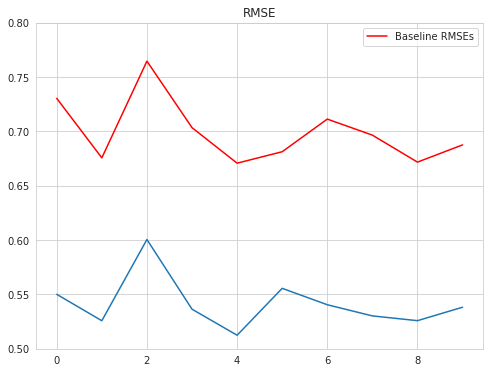

In [18]:
plt.figure(figsize=(8,6))

plt.plot(cv_rmses)
plt.plot(cv_rmses_baseline, 'r-', label="Baseline RMSEs")
plt.legend()
plt.ylim(.5, .8)
plt.title('RMSE')

plt.show()